## Jordi Blasco Lozano  
### Visualización de Imágenes y Keypoints – Parte 1

- #### Librerías y Configuración Inicial

    En este bloque se importan las librerías necesarias para la visualización.

    También se importa el módulo **DataLoader** para cargar nuestro dataset de paths.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio

from archivos.dataloader import DataLoader


- #### Carga del Dataset

    A continuación, se instancia la clase **DataLoader** para cargar los datos.  
    El DataFrame resultante contiene todas las rutas de las imágenes y los archivos que contienen los keypoints, permitiendo acceder a la información de cada categoría.

In [2]:
dl = DataLoader()
dfs = dl.load_data()

- #### Redimensionamiento de Imágenes y Ajuste de Keypoints


    Redimensionaremos todas las imágenes a `256 x 256` píxeles y los keypoints también, para así mostrarlas todas en plots de 2 x 4 imágenes y que los puntos coincidan. Esta función también se usará en la siguiente practica de visualización ya que haremos lo mismo:
    
    - cargar paths, generar imagenes y puntos, redimensionar y devolver imagenes y puntos redimensionados

In [3]:
# Tamaño objetivo para redimensionar las imágenes
obj_resize = (256, 256)

def load_img_and_keypoints_from_row(row):
    """
    Carga la imagen y sus keypoints a partir de una fila del dataframe.
    """
    img_path = row['img']
    mat_path = row['mat']
    
    # Cargar la imagen
    img = Image.open(img_path)
    # Cargar el archivo .mat que contiene los keypoints
    mat_data = sio.loadmat(mat_path)
    kpts = np.array(mat_data['pts_coord']) 
    
    # Determinar el tamaño original de la imagen
    orig_size = img.size  
    
    # Escalar los keypoints al nuevo tamaño
    kpts[0] = kpts[0] * obj_resize[0] / orig_size[0]
    kpts[1] = kpts[1] * obj_resize[1] / orig_size[1]
    
    # Redimensionar la imagen
    img_resized = img.resize(obj_resize, resample=Image.BILINEAR)
    
    return img_resized, kpts


- #### Funciones de Visualización

    Usaremos una función que ploteará en el eje correspondiente cada imagen con sus puntos **`plot_image_with_keypoints()`**, además de otra función que seleccionará aleatoriamente 8 filas de un nuevo dataframe creado a partir del dataframe grande que contendrá los paths de la categoria que se quiera mostrar. Posteriormente se llamará a la función que devuelve las imagenes redimensionadas con estos 8 paths para plotearlas con la función que las plotea **`plot_category_grid_for_exercise()`**

In [5]:

def plot_image_with_keypoints(ax, img, kpts):
    """
    Dibuja la imagen junto con sus keypoints en el eje indicado.
    """
    ax.imshow(img)
    ax.scatter(kpts[0], kpts[1], c='w', edgecolors='k')
    ax.axis('off')

def plot_category_grid_for_exercise(category, dfs ,num_images=8):
    """
    Visualiza en un grid las imágenes y keypoints para una categoría dada.
    Se seleccionan 'num_images' aleatorias del dataframe correspondiente.
    """
    # Usamos el dataframe grande para generar el dataframe de la categoría pedida
    key = f"{category}"
    df = dfs.get(key, None)
    
    # sample selecciona aleatoriamente 8 filas del dataframe que corresponderan a los paths de las imágenes y los keypoints y posteriormente se llamará a la función load_img_and_keypoints_from_row para cargar las imágenes y keypoints correspondientes
    sample_rows = df.sample(num_images)
    ncols = 4
    nrows = (len(sample_rows) + ncols - 1) // ncols

    # Crear el grid de subplots
    fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))

    # Al usar axs.flatten() convertimos la matriz (array 2D) de ejes que devuelve plt.subplots en un array 1D. Esto permite iterar fácilmente sobre todos los subplots con un índice simple, sin tener que lidiar con la indexación bidimensional (por filas y columnas).
    axs = axs.flatten() 
    
    # Itera sobre las filas seleccionadas para mostrar las imágenes y keypoints correspondientes llamando a la función plot_image_with_keypoints con la categoría con la que se llama a la función principal
    for i, (_, row) in enumerate(sample_rows.iterrows()):

        img, kpts = load_img_and_keypoints_from_row(row)
        plot_image_with_keypoints(axs[i], img, kpts)
        axs[i].set_title(f"{category.capitalize()} {i+1}")

    
    # Apagar ejes sobrantes
    for ax in axs[len(sample_rows):]:
        ax.axis("off")
    
    fig.suptitle(f"Visualización de {category.capitalize()} (8 imágenes)", fontsize=16)
    plt.show()



- #### Ejercicios

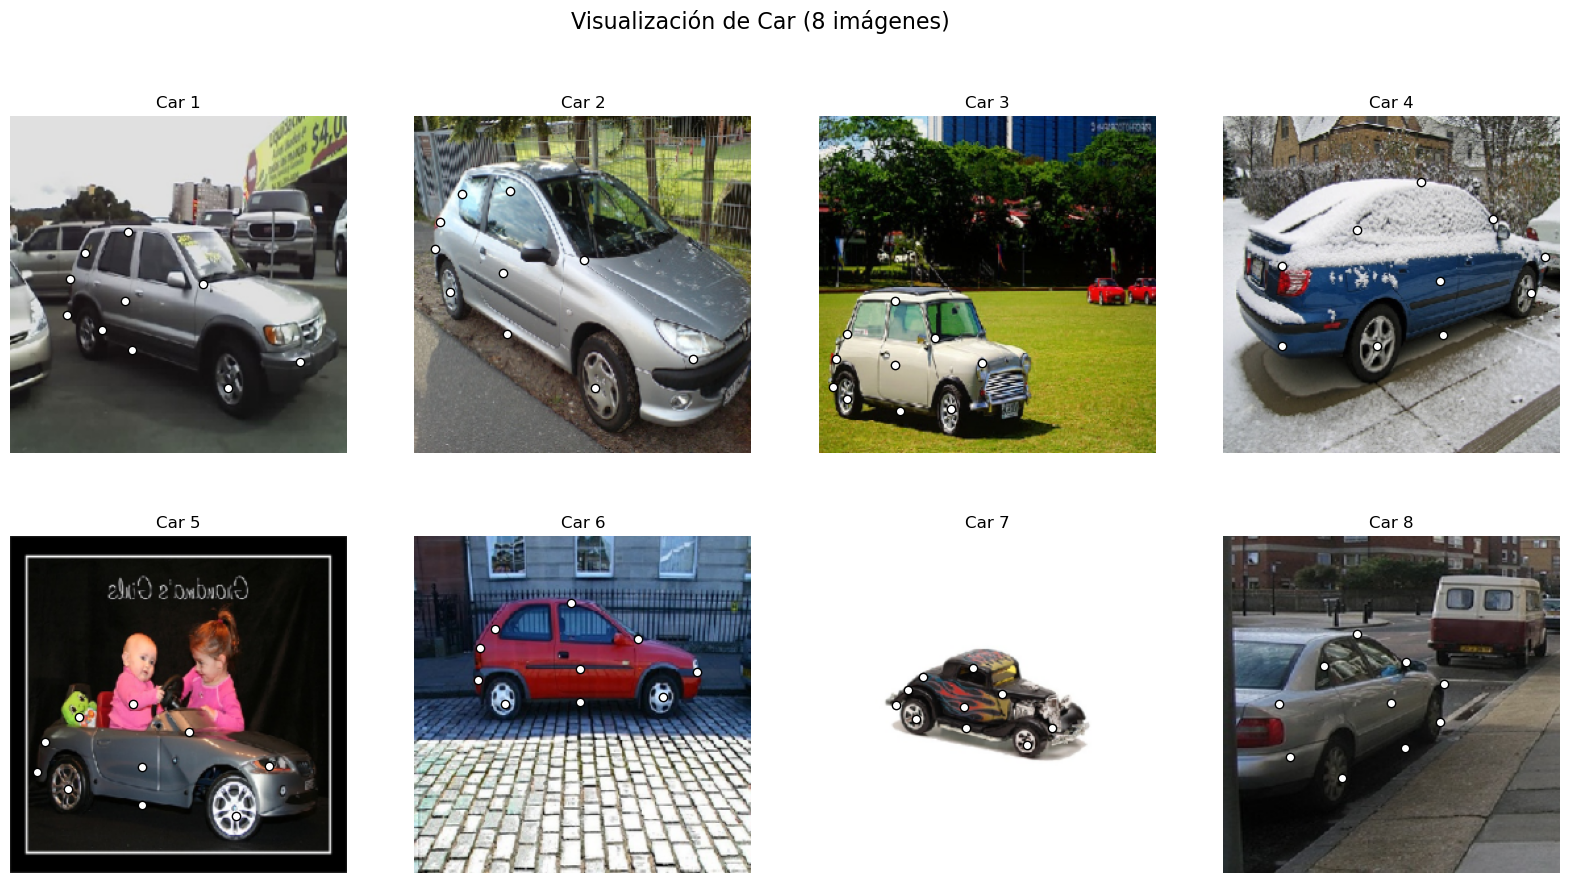

In [6]:
# Ejercicio 1: Visualizar 8 imágenes y keypoints de la categoría Car
plot_category_grid_for_exercise("car", dfs=dfs)

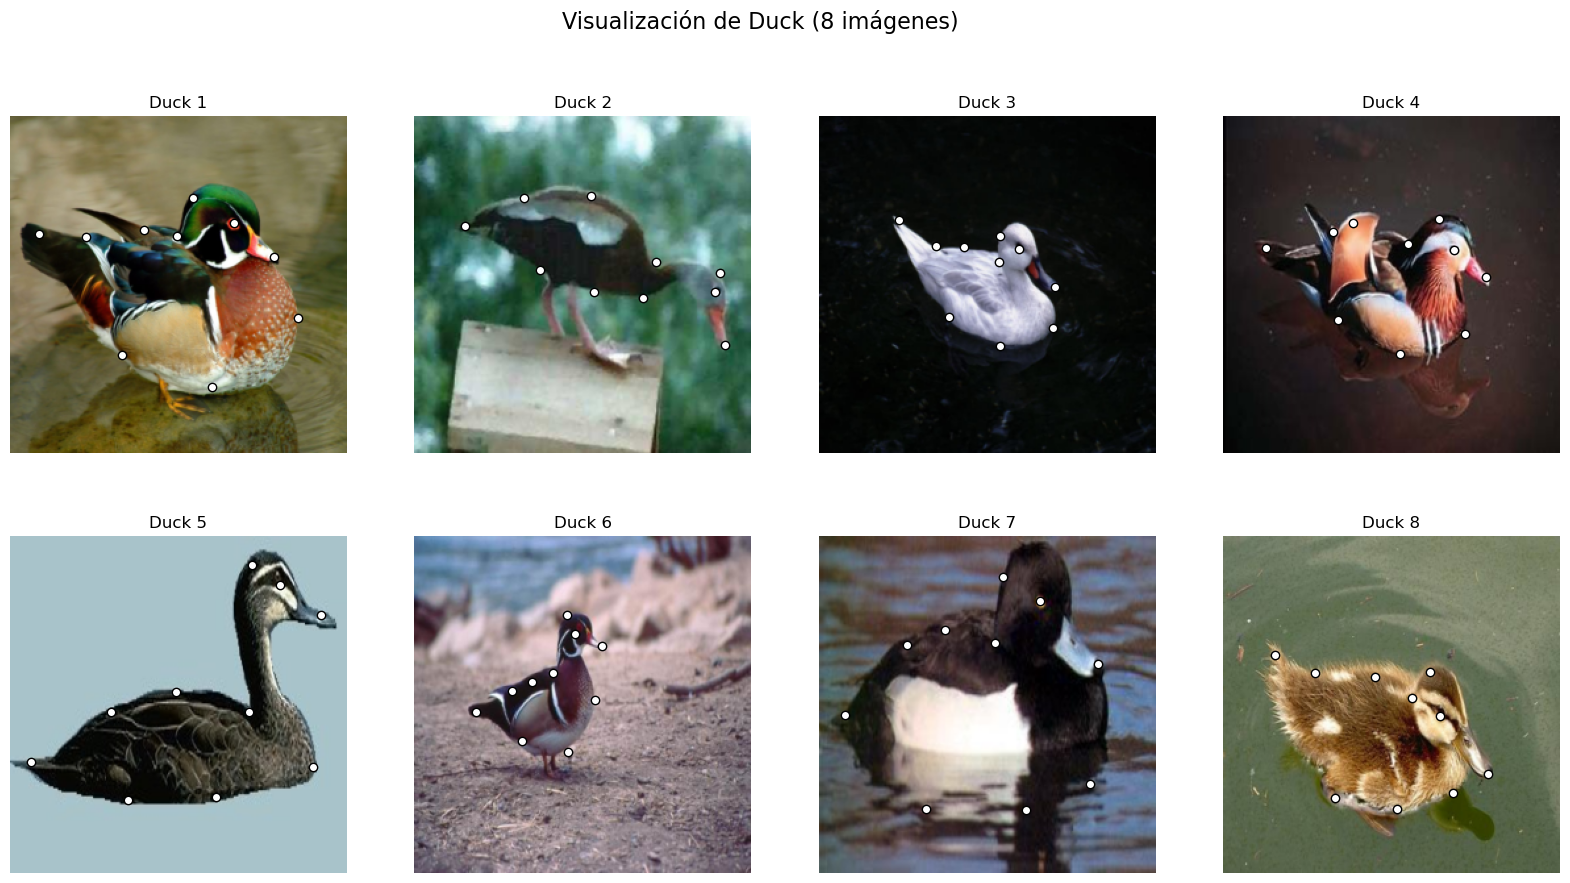

In [7]:
# Ejercicio 2: Visualizar 8 imágenes y keypoints de la categoría Duck
plot_category_grid_for_exercise("duck", dfs=dfs)

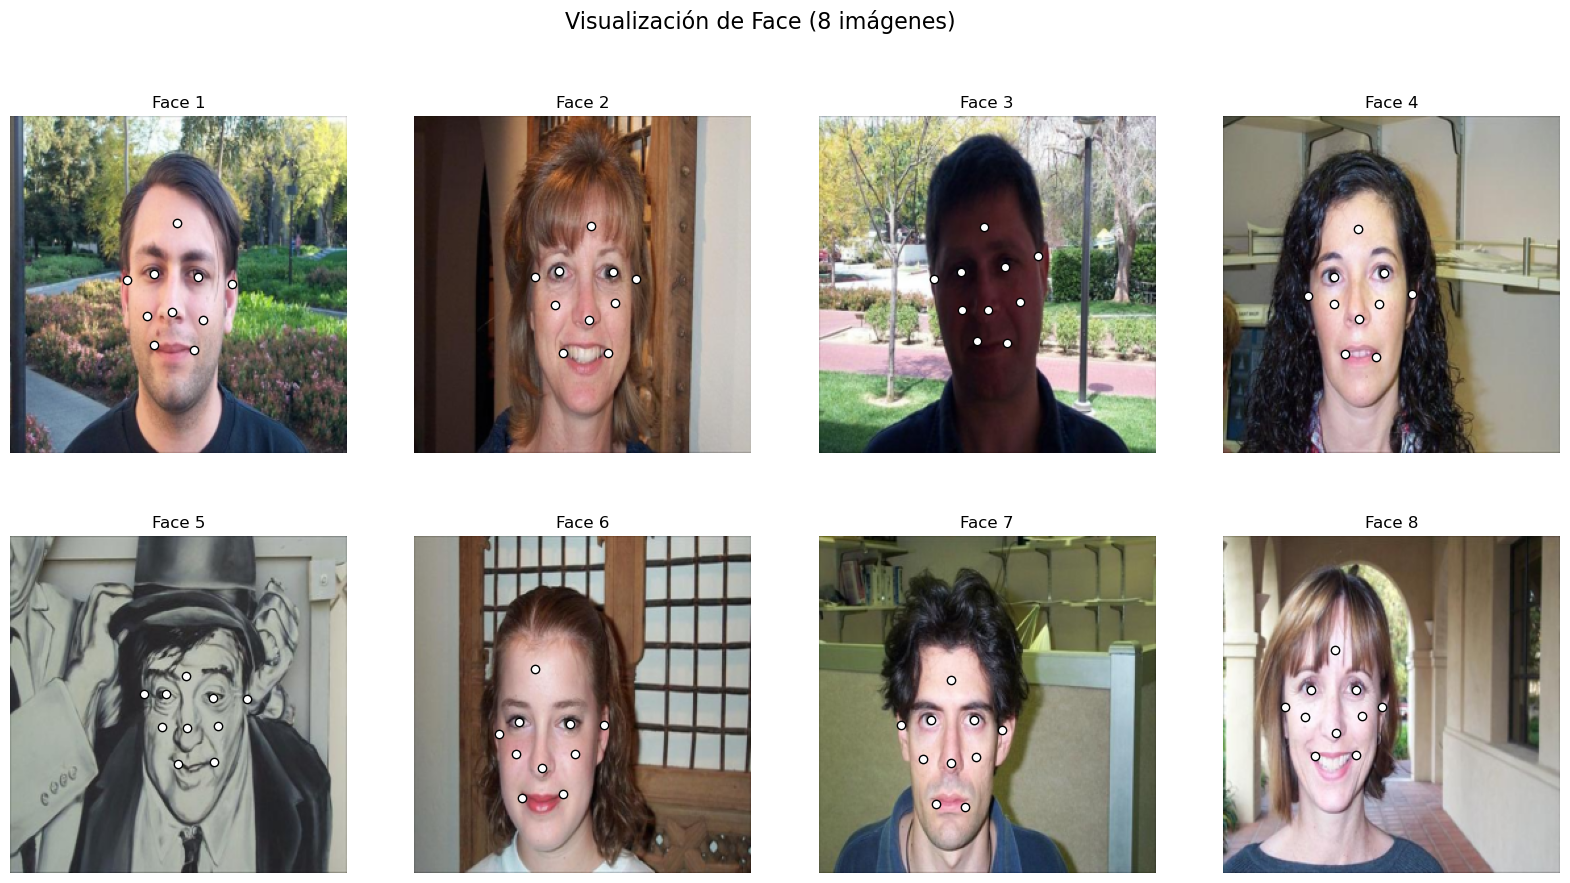

In [8]:
# Ejercicio 3: Visualizar 8 imágenes y keypoints de la categoría Face
plot_category_grid_for_exercise("face", dfs=dfs)

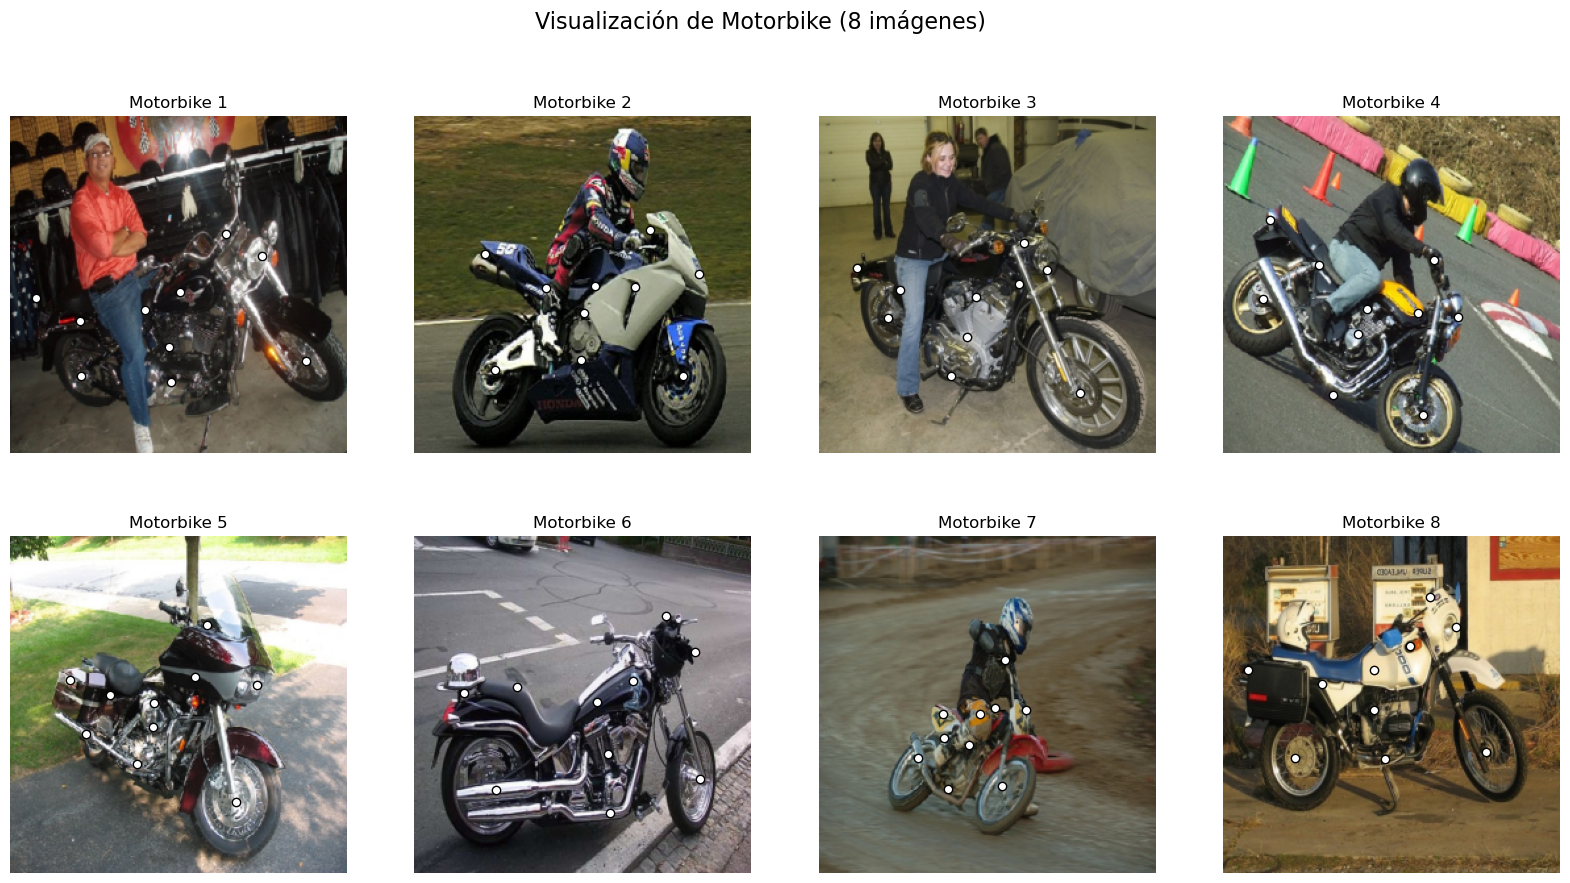

In [9]:
# Ejercicio 4: Visualizar 8 imágenes y keypoints de la categoría Motorbike
plot_category_grid_for_exercise("motorbike", dfs=dfs)

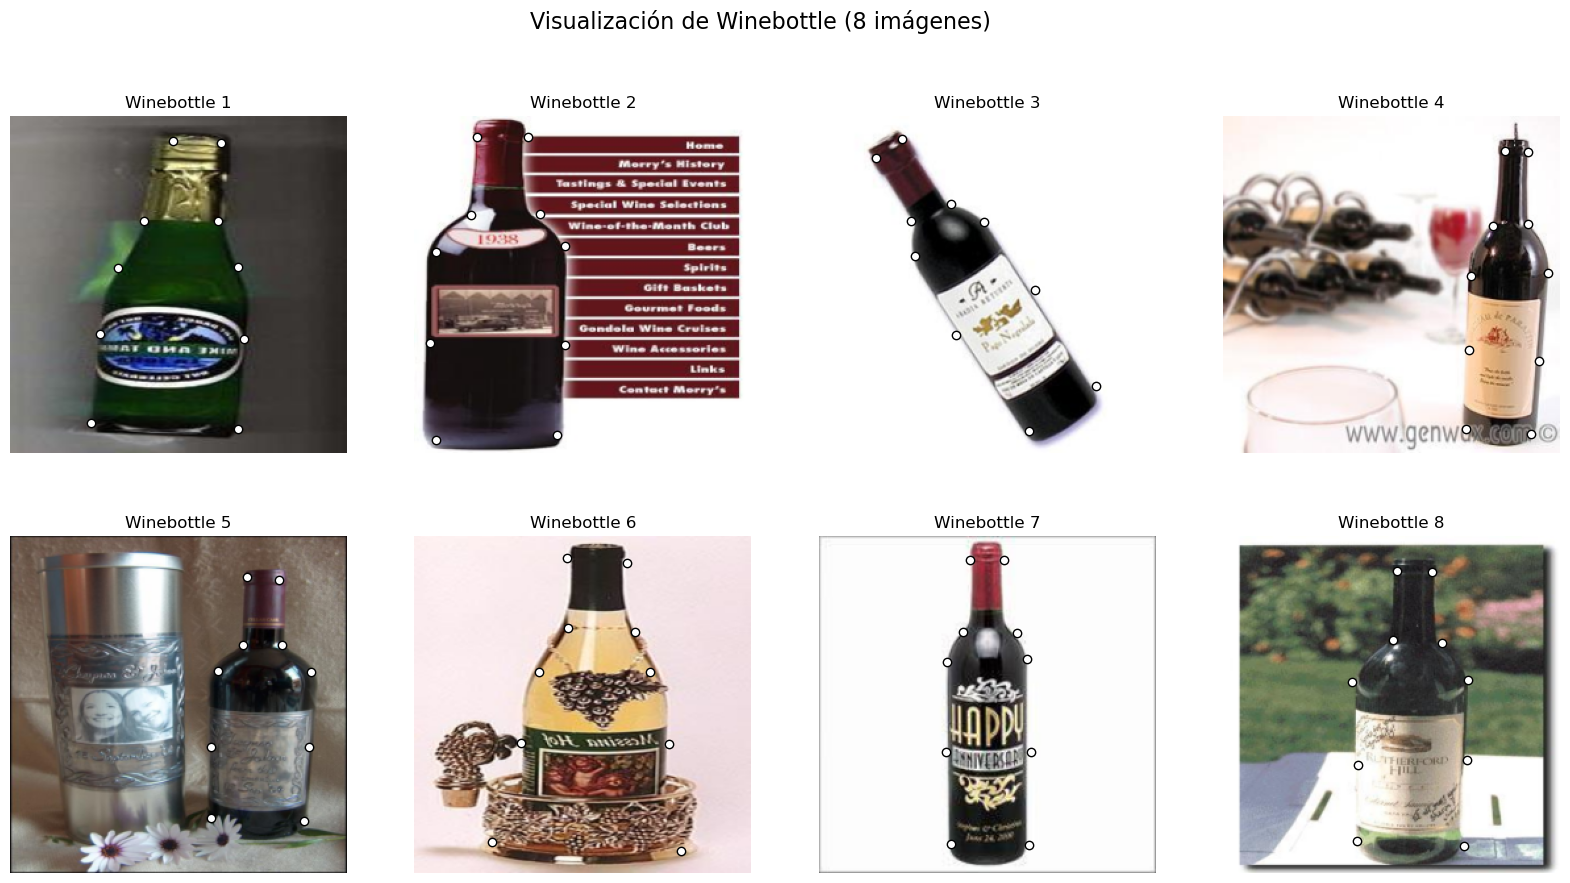

In [10]:
# Ejercicio 5: Visualizar 8 imágenes y keypoints de la categoría Winebottle
plot_category_grid_for_exercise("winebottle", dfs=dfs)